# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad FIkry Rizal
- **Email:** rizal@dicoding.com
- **ID Dicoding:** muhammad_fikry_rizal

## Menentukan Pertanyaan Bisnis

Berikut adalah pertanyaan bisnis yang dapat diajukan berdasarkan eksplorasi data **Data Hour** dan **Data Day**:

---

### **📌 Pertanyaan Bisnis Berdasarkan `Data Hour`**
1. **Bagaimana tren penggunaan sepeda sepanjang hari?**  
2. **Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda per jam?**
3. **Apakah ada musim tertentu yang mempengaruhi pola penyewaan sepeda?**  

---

### **📌 Pertanyaan Bisnis Berdasarkan `Data Day`**
1. **Bagaimana tren penggunaan sepeda dari bulan ke bulan serta perbedaan perilaku pengguna terdaftar (`registered`) dan pengguna kasual (`casual`)?**  

2. **Seberapa besar dampak faktor cuaca terhadap penggunaan sepeda dalam skala bulanan?**

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv')
data_hour = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv')

### Assessing Data

In [ ]:
print(data_day.info())
data_day.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print(data_hour.info())
data_hour.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print(data_day.isna().sum())
print('=='*50)
print('Jumlah duplikasi:', data_day.duplicated().sum())
print('Jumlah data:', data_day.shape)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi: 0
Jumlah data: (731, 16)


In [ ]:
print(data_hour.isna().sum())
print('=='*50)
print('Jumlah duplikasi:', data_hour.duplicated().sum())
print('Jumlah data:', data_hour.shape)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi: 0
Jumlah data: (17379, 17)


#### **Latar Belakang (Background)**
- Data ini berasal dari "Bike sharing systems" adalah versi modern dari penyewaan sepeda yang seluruh prosesnya dilakukan secara otomatis, mulai dari pendaftaran, penyewaan, hingga pengembalian.
- Sistem ini populer di seluruh dunia karena manfaatnya terhadap transportasi, lingkungan, dan kesehatan.
- Data yang dihasilkan dari sistem ini dapat digunakan untuk riset, karena mencatat waktu perjalanan, titik keberangkatan, dan tujuan secara eksplisit.
- Dengan data ini, peneliti dapat mendeteksi pola pergerakan masyarakat dan peristiwa penting di kota.

---

#### **Struktur Dataset**
Dataset terdiri dari dua file utama:
- **hour.csv** → Data agregasi per jam (total 17.379 entri).
- **day.csv** → Data agregasi per hari (total 731 entri).

**Setiap file memiliki kolom berikut:**
- **instant** → Indeks rekaman.
- **dteday** → Tanggal.
- **season** → Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter).
- **yr** → Tahun (0: 2011, 1: 2012).
- **mnth** → Bulan (1–12).
- **hr** (hanya di `hour.csv`) → Jam (0–23).
- **holiday** → Apakah hari libur atau bukan.
- **weekday** → Hari dalam seminggu.
- **workingday** → Apakah hari kerja atau bukan (0: akhir pekan/libur, 1: hari kerja).
- **weathersit** → Kondisi cuaca:
  - 1: Cerah, sedikit berawan.
  - 2: Kabut, mendung.
  - 3: Hujan ringan, salju ringan.
  - 4: Hujan deras, badai.
- **temp** → Suhu normalisasi (dalam Celsius, dibagi dengan 41).
- **atemp** → Suhu yang dirasakan (dibagi dengan 50).
- **hum** → Kelembaban (dibagi dengan 100).
- **windspeed** → Kecepatan angin (dibagi dengan 67).
- **casual** → Jumlah penyewa sepeda tanpa registrasi.
- **registered** → Jumlah penyewa sepeda terdaftar.
- **cnt** → Total jumlah sepeda yang disewa (casual + registered).


### Cleaning Data

In [ ]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])
print(data_day.info())
print('=='*50)
print(data_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
data_day['season'] = data_day['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
data_hour['season'] = data_hour['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

data_day['yr'] = data_day['yr'].replace({0:2011, 1:2012})
data_hour['yr'] = data_hour['yr'].replace({0:2011, 1:2012})

data_day['workingday'] = data_day['workingday'].replace({0:'Weekend', 1:'Weekday'})
data_hour['workingday'] = data_hour['workingday'].replace({0:'Weekend', 1:'Weekday'})

data_day['weathersit'] = data_day['weathersit'].replace({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Snow'})
data_hour['weathersit'] = data_hour['weathersit'].replace({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Snow'})

data_day['temp'] = data_day['temp']*41
data_hour['temp'] = data_hour['temp']*41

data_day['atemp'] = data_day['atemp']*50
data_hour['atemp'] = data_hour['atemp']*50

data_day['hum'] = data_day['hum']*100
data_hour['hum'] = data_hour['hum']*100

data_day['windspeed'] = data_day['windspeed']*67
data_hour['windspeed'] = data_hour['windspeed']*67

data_hour['weekday'] = data_hour['weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
data_day['weekday'] = data_day['weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [ ]:
print(data_day.info())
print('=='*50)
print(data_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
data_hour.to_csv('hour_cleaned.csv', index=False)
data_day.to_csv('day_cleaned.csv', index=False)

#### **Penjelasan Transformasi Data pada Dataset Bike Sharing**

Transformasi data yang dilakukan bertujuan untuk **meningkatkan keterbacaan dan interpretabilitas** dataset Bike Sharing. Berikut adalah analisis dari setiap transformasi yang diterapkan:

---

**Transformasi Kategori Musim (`season`)**  
**Sebelum:** `1, 2, 3, 4`  
**Setelah:** `"Spring", "Summer", "Fall", "Winter"`

**Penjelasan:**  
- Mengubah angka musim menjadi nama musim yang lebih intuitif memudahkan analisis tren penggunaan sepeda berdasarkan musim.  
- Misalnya, kita bisa langsung memahami bahwa **penyewaan lebih tinggi di "Summer"** dibandingkan dengan "Winter" tanpa harus mengingat kembali kode numeriknya.  

---

**Transformasi Kategori Tahun (`yr`)**  
**Sebelum:** `0 = 2011, 1 = 2012`  
**Setelah:** `2011, 2012`

**Penjelasan:**  
- Menggunakan angka tahun sebenarnya meningkatkan keterbacaan data dan mengurangi ambiguitas.  
- Lebih mudah menganalisis tren perubahan penyewaan dari **2011 ke 2012**, terutama saat melakukan perbandingan antar periode.  

---

**Transformasi Kategori Hari Kerja (`workingday`)**  
**Sebelum:** `0 = Bukan Hari Kerja, 1 = Hari Kerja`  
**Setelah:** `"Weekend", "Weekday"`

**Penjelasan:**  
- Dengan perubahan ini, kita bisa langsung melihat apakah penyewaan lebih tinggi di **akhir pekan (Weekend)** atau **hari kerja (Weekday)** tanpa perlu menafsirkan angka `0` dan `1`.  
- Hal ini juga memudahkan analisis untuk memahami **apakah sepeda lebih sering digunakan untuk commuting atau rekreasi**.  

---

**Transformasi Kategori Cuaca (`weathersit`)**  
**Sebelum:**  
- `1 = Clear`
- `2 = Mist`
- `3 = Light Snow`
- `4 = Heavy Snow`  

**Setelah:**  
- `"Clear", "Mist", "Light Snow", "Heavy Snow"`

**Penjelasan:**  
- Penggunaan nama kondisi cuaca membantu analisis dalam **menentukan dampak cuaca terhadap penyewaan sepeda**.  
- Sebelumnya, kita harus mengingat kembali arti angka dalam `weathersit`, tetapi sekarang lebih mudah untuk melihat pola bahwa **penyewaan lebih tinggi saat cuaca "Clear" dan lebih rendah saat "Heavy Snow"**.  

---

**Transformasi Skala Cuaca (`temp`, `atemp`, `hum`, `windspeed`)**  
- **Suhu (`temp`) dikalikan 41** → Skala dikembalikan ke Celsius  
- **Suhu terasa (`atemp`) dikalikan 50** → Skala dikembalikan ke Celsius  
- **Kelembaban (`hum`) dikalikan 100** → Skala dikembalikan ke persentase  
- **Kecepatan angin (`windspeed`) dikalikan 67** → Skala dikembalikan ke km/h  

**Penjelasan:**  
- Sebelumnya, nilai-nilai ini **dinormalisasi** dalam rentang **0-1**, yang kurang intuitif saat dibaca.  
- Dengan melakukan transformasi kembali ke **skala aslinya**, kita dapat langsung membaca **berapa suhu sebenarnya (dalam Celsius), berapa kelembaban (%)**, dan **berapa kecepatan angin (km/h)** tanpa perlu melakukan perhitungan ulang.  
- Memudahkan interpretasi tanpa harus melakukan **de-normalisasi setiap kali melakukan analisis cuaca terhadap penyewaan sepeda**.  

---

**Transformasi Kategori Hari (`weekday`)**  
**Sebelum:** `0-6`  
**Setelah:** `"Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"`

**Penjelasan:**  
- Menggunakan nama hari memungkinkan **analisis tren penyewaan berdasarkan hari dalam seminggu dengan lebih intuitif**.  
- Kita dapat langsung melihat **apakah penyewaan lebih tinggi di "Saturday" dan "Sunday" dibandingkan hari kerja** tanpa harus menerjemahkan angka `0-6`.  

---

## Exploratory Data Analysis (EDA)

### Explore for Data Hour

In [ ]:
data_hour.describe()

,instant,dteday,yr,mnth,hr,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,0.028770,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,0.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,0.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,0.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,1.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [ ]:
categorical_column = data_hour.select_dtypes(include='object').drop(columns=['weekday'])
for column in categorical_column:
  print(column,':',data_hour[column].value_counts())
  print('=='*50)

season : season
Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: count, dtype: int64
workingday : workingday
Weekday    11865
Weekend     5514
Name: count, dtype: int64
weathersit : weathersit
Clear         11413
Mist           4544
Light Snow     1419
Heavy Snow        3
Name: count, dtype: int64


In [ ]:
data_hour.groupby(['hr']).agg({
    'cnt':'sum','casual':'sum','registered':'sum','temp':'mean','atemp':'mean','hum':'mean','windspeed':'mean'
    }).astype('int').sort_values(by='cnt',ascending=False).reset_index().head(10)

,hr,cnt,casual,registered,temp,atemp,hum,windspeed
0,17,336860,54220,282640,22,26,51,15
1,18,309772,44496,265276,22,25,53,15
2,8,261001,15761,245240,18,22,70,11
3,16,227748,53834,173914,23,26,49,15
4,19,226789,35505,191284,21,24,57,14
5,13,184919,52713,132206,22,26,51,14
6,12,184414,49718,134696,22,25,53,14
7,15,183149,54606,128543,23,26,49,15
8,14,175652,55089,120563,23,26,49,15
9,20,164550,26378,138172,20,24,60,13


In [ ]:
hour_trend = data_hour.groupby(['hr']).agg({
    'cnt':'sum','casual':'sum','registered':'sum','temp':'mean','atemp':'mean','hum':'mean','windspeed':'mean'
    }).astype('int').sort_values(by='cnt',ascending=False).reset_index()

print(np.sum(hour_trend['cnt']))

3292679


In [ ]:
data_hour.groupby(['season']).agg({
    'cnt':'sum','casual':'sum','registered':'sum','temp':'mean','atemp':'mean','hum':'mean','windspeed':'mean'
    }).astype('int').sort_values(by='cnt',ascending=False).reset_index()

,season,cnt,casual,registered,temp,atemp,hum,windspeed
0,Fall,1061129,226091,835038,28,32,63,11
1,Summer,918589,203522,715067,22,26,62,13
2,Winter,841613,129782,711831,17,20,66,11
3,Spring,471348,60622,410726,12,14,58,14


**Insight:**
**Analisis Data Penyewaan Sepeda Berdasarkan Jam dan Musim**  

---

**Analisis Penyewaan Sepeda Berdasarkan Jam (`hr`)**  

Dari tabel pertama, dapat diamati bahwa terdapat beberapa jam dalam sehari dengan **jumlah penyewaan sepeda tertinggi**, yaitu:  
- **Jam 17:00 (5 sore) → 336.860 sewa** (tertinggi)  
- **Jam 18:00 (6 sore) → 309.772 sewa**  
- **Jam 08:00 (8 pagi) → 261.001 sewa**  
- **Jam 16:00 (4 sore) → 227.748 sewa**  
- **Jam 19:00 (7 malam) → 226.789 sewa**  

**Insight:**  
- **Pola commuting terlihat jelas**, di mana puncak penyewaan terjadi pada **jam 8 pagi (waktu berangkat kerja/sekolah)** dan **jam 5-6 sore (waktu pulang kerja/sekolah)**.  
- **Pengguna terdaftar (`registered`) mendominasi jumlah penyewaan**, terutama pada jam sibuk, yang menunjukkan bahwa mayoritas pengguna menggunakan sepeda sebagai transportasi harian.  
- **Pengguna kasual (`casual`) lebih tinggi di sore hari**, menunjukkan tren rekreasi atau penggunaan di luar keperluan kerja/sekolah.  

**Faktor yang Berpengaruh**  
- **Suhu (`temp`) cukup stabil** pada kisaran 20-23°C pada jam-jam dengan penyewaan tertinggi, yang kemungkinan mendukung kenyamanan bersepeda.  
- **Kelembaban (`hum`) berada di kisaran 49-70%, dengan sedikit variasi, tetapi tidak terlalu ekstrem untuk mempengaruhi tren penyewaan secara drastis.  
- **Kecepatan angin (`windspeed`) juga stabil di sekitar 11-15 km/h**, menunjukkan kondisi angin yang tidak terlalu menghambat mobilitas pesepeda.  

---

**Analisis Penyewaan Sepeda Berdasarkan Musim (`season`)**  

Dari tabel kedua, kita dapat melihat **jumlah penyewaan sepeda berdasarkan musim**, dengan hasil sebagai berikut:  
- **Musim Gugur (`Fall`) → 1.061.129 penyewaan (tertinggi)**  
- **Musim Panas (`Summer`) → 918.589 penyewaan**  
- **Musim Dingin (`Winter`) → 841.613 penyewaan**  
- **Musim Semi (`Spring`) → 471.348 penyewaan (terendah)**  

**Insight:**  
- **Musim gugur (`Fall`) memiliki jumlah penyewaan tertinggi**, kemungkinan karena kondisi cuaca yang nyaman dan stabil.  
- **Musim panas (`Summer`) juga memiliki jumlah penyewaan yang tinggi**, tetapi mungkin dipengaruhi oleh suhu yang lebih panas yang sedikit mengurangi kenyamanan.  
- **Musim dingin (`Winter`) masih memiliki jumlah penyewaan yang signifikan**, terutama dari pengguna terdaftar (`registered`), menunjukkan bahwa sepeda tetap digunakan sebagai moda transportasi utama meskipun suhu lebih rendah.  
- **Musim semi (`Spring`) memiliki jumlah penyewaan terendah**, kemungkinan karena faktor cuaca yang kurang stabil dengan kemungkinan hujan yang lebih tinggi.  


### Explore for Data Day


In [ ]:
data_day.describe()

,instant,dteday,yr,mnth,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,0.028728,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,0.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,0.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,0.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [ ]:
categorical_column = data_day.select_dtypes(include='object').drop(columns=['weekday'])
for column in categorical_column:
  print(column,':',data_day[column].value_counts())
  print('=='*50)

season : season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64
workingday : workingday
Weekday    500
Weekend    231
Name: count, dtype: int64
weathersit : weathersit
Clear         463
Mist          247
Light Snow     21
Name: count, dtype: int64


In [ ]:
data_day.groupby(['mnth']).agg({'cnt':'sum'}).sort_values(by='cnt').reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,12,211036
3,3,228920
4,11,254831
5,4,269094
6,10,322352
7,5,331686
8,7,344948
9,9,345991


In [ ]:
data_day.groupby(['mnth']).agg({'casual':'sum','registered':'sum'}).reset_index().sort_values(by='registered')

,mnth,casual,registered
0,1,12042,122891
1,2,14963,136389
2,3,44444,184476
11,12,21693,189343
3,4,60802,208292
10,11,36603,218228
4,5,75285,256401
9,10,59760,262592
6,7,78157,266791
5,6,73906,272436


In [ ]:
data_day.groupby(['mnth']).agg({'temp':'mean','atemp':'mean','hum':'mean','windspeed':'mean'}).astype('int').reset_index()

,mnth,temp,atemp,hum,windspeed
0,1,9,11,58,13
1,2,12,14,56,14
2,3,16,19,58,14
3,4,19,22,58,15
4,5,24,28,68,12
5,6,28,31,57,12
6,7,30,35,59,11
7,8,29,32,63,11
8,9,25,28,71,11
9,10,19,23,69,11


### **Penjelasan Exploratory Data Analysis (EDA):**
 **Analisis Penyewaan Sepeda Berdasarkan Bulan (`mnth`)**  

Berdasarkan ketiga tabel yang menunjukkan **jumlah penyewaan sepeda (`cnt`)**, **perbedaan antara pengguna kasual dan terdaftar (`casual` & `registered`)**, serta **pengaruh cuaca terhadap penyewaan (`temp`, `atemp`, `hum`, `windspeed`)**, kita dapat memperoleh beberapa wawasan penting.

---

**Analisis Jumlah Penyewaan Sepeda per Bulan**  

- **Bulan dengan penyewaan tertinggi** → **Agustus (`mnth=8`): 351.194 sepeda**  
- **Bulan dengan penyewaan terendah** → **Januari (`mnth=1`): 134.933 sepeda**  
- **Tren Umum**:
  - Penyewaan meningkat secara bertahap dari Januari hingga mencapai puncaknya pada Agustus.
  - Setelah Agustus, jumlah penyewaan mulai menurun kembali hingga Desember.

**Kesimpulan:**  
- **Penyewaan sepeda cenderung lebih tinggi di musim panas (Juni-Agustus)** dan lebih rendah di musim dingin (Desember-Februari).  
- **Bulan musim semi dan gugur memiliki angka menengah**, dengan peningkatan bertahap setelah musim dingin.  

---

**Analisis Perbedaan Pengguna Kasual vs Terdaftar**  

- **Pengguna kasual (`casual`)** lebih banyak menggunakan sepeda pada **bulan-bulan musim panas (Juni-Agustus)**.
  - Puncak penyewaan pengguna kasual terjadi pada **Juli (`78.157` penyewaan) dan Agustus (`72.039` penyewaan)**.
  - Pengguna kasual jauh lebih sedikit di bulan Januari (`12.042` penyewaan).
  
- **Pengguna terdaftar (`registered`)** memiliki jumlah penyewaan yang **lebih stabil sepanjang tahun**, tetapi tetap meningkat pada musim panas.
  - Puncak penyewaan terjadi di **Agustus (`279.155` penyewaan)**.
  - Pengguna terdaftar masih menggunakan sepeda bahkan pada musim dingin, dengan **Januari tetap memiliki `122.891` penyewaan**.

**Kesimpulan:**  
- **Pengguna kasual lebih dipengaruhi oleh musim** dan lebih banyak menggunakan sepeda saat cuaca lebih hangat.  
- **Pengguna terdaftar lebih stabil**, tetapi tetap menunjukkan peningkatan pada bulan-bulan yang lebih hangat.  
- **Strategi bisnis** dapat menargetkan **promosi khusus untuk pengguna kasual di musim dingin** agar mereka tetap menggunakan layanan.  

---

**Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda**  

 **Suhu (`temp` & `atemp`)**  
- **Bulan dengan suhu tertinggi** → **Juli (`temp=30`, `atemp=35`)**  
- **Bulan dengan suhu terendah** → **Januari (`temp=9`, `atemp=11`)**  
- Penyewaan sepeda meningkat seiring dengan kenaikan suhu hingga mencapai puncaknya di musim panas.

 **Kelembaban (`hum`)**  
- **Bulan dengan kelembaban tertinggi** → **September (`hum=71%`)**  
- **Bulan dengan kelembaban terendah** → **Juni (`hum=57%`)**  
- Tidak ada korelasi langsung yang terlihat antara kelembaban dan jumlah penyewaan, tetapi kelembaban yang terlalu tinggi dapat mengurangi kenyamanan pengguna.

 **Kecepatan Angin (`windspeed`)**  
- Kecepatan angin cukup stabil di semua bulan, berkisar antara **11-15 km/h**.  
- Karena perbedaan kecepatan angin tidak signifikan, faktor ini tidak terlalu mempengaruhi pola penyewaan sepeda.

**Kesimpulan:**  
- **Suhu memiliki pengaruh besar terhadap penyewaan sepeda**, di mana semakin tinggi suhu, semakin banyak penyewaan.  
- **Kelembaban yang terlalu tinggi mungkin sedikit menurunkan kenyamanan bersepeda**, tetapi tidak berdampak signifikan.  
- **Kecepatan angin tidak berpengaruh besar**, karena anginnya relatif konstan sepanjang tahun.  

## Visualization & Explanatory Analysis

### **📌 Pertanyaan Bisnis Berdasarkan `Data Hour`**
1. **Bagaimana tren penggunaan sepeda sepanjang hari?**  


In [ ]:
# Mengelompokkan data berdasarkan jam ('hr') dan menghitung agregasi
hourly_trend = data_hour.groupby(['hr']).agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).astype(int).reset_index()

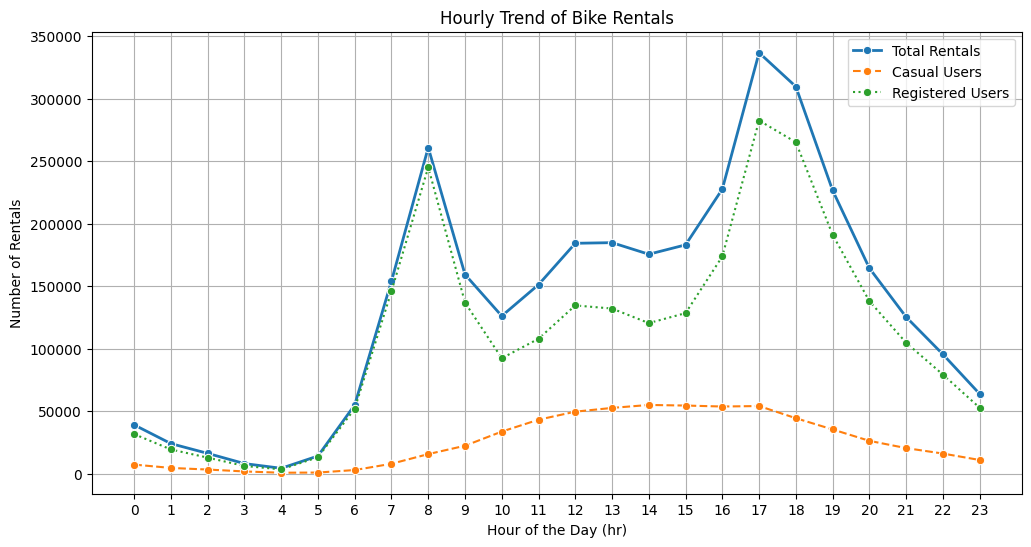

In [ ]:
# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(12,6))

# Plot garis menggunakan ax
sns.lineplot(x='hr', y='cnt', data=hourly_trend, marker='o', label='Total Rentals', linewidth=2, ax=ax)
sns.lineplot(x='hr', y='casual', data=hourly_trend, marker='o', label='Casual Users', linestyle='dashed', ax=ax)
sns.lineplot(x='hr', y='registered', data=hourly_trend, marker='o', label='Registered Users', linestyle='dotted', ax=ax)

# Menambahkan label dan judul
ax.set_xlabel("Hour of the Day (hr)")
ax.set_ylabel("Number of Rentals")
ax.set_title("Hourly Trend of Bike Rentals")
ax.set_xticks(range(0, 24))  # Menampilkan semua jam dari 0-23
ax.legend()
ax.grid(True)

# Menampilkan plot
plt.show()

2. **Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda per jam?**

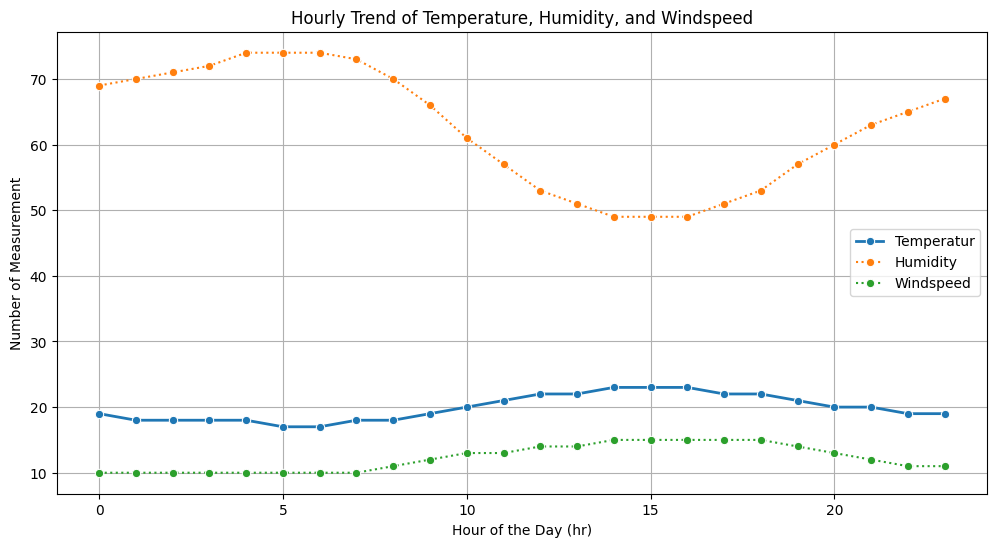

In [ ]:
# Membuat visualisasi tren jumlah penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='temp', data=hourly_trend, marker='o', label='Temperatur', linewidth=2)
sns.lineplot(x='hr', y='hum', data=hourly_trend, marker='o', label='Humidity', linestyle='dotted')
sns.lineplot(x='hr', y='windspeed', data=hourly_trend, marker='o', label='Windspeed', linestyle='dotted')
# Menambahkan label dan judul
plt.xlabel("Hour of the Day (hr)")
plt.ylabel("Number of Measurement")
plt.title("Hourly Trend of Temperature, Humidity, and Windspeed")
plt.legend()
plt.grid(True)
plt.show()

3. **Apakah ada musim tertentu yang mempengaruhi pola penyewaan sepeda?**

In [ ]:
# Mengelompokkan data berdasarkan musim (season) dan menghitung agregasi
seasonal_trend = data_hour.groupby(['season']).agg({'cnt': 'sum'}).astype(int).reset_index().sort_values(by='cnt',ascending=False)

<ipython-input-26-bc0e3098c889>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_trend, palette='coolwarm')


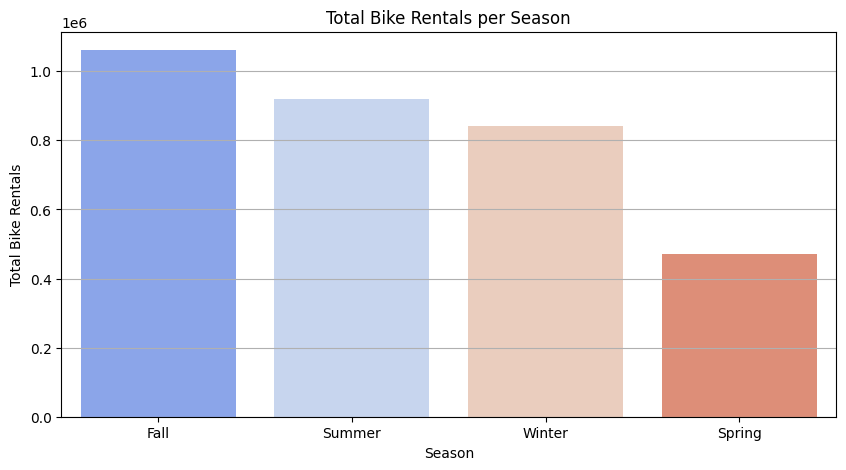

In [ ]:
# Membuat visualisasi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10,5))
sns.barplot(x='season', y='cnt', data=seasonal_trend, palette='coolwarm')

# Menambahkan label dan judul
plt.xlabel("Season")
plt.ylabel("Total Bike Rentals")
plt.title("Total Bike Rentals per Season")
plt.grid(axis='y')
plt.show()

---

### **📌 Pertanyaan Bisnis Berdasarkan `Data Day`**
1. **Bagaimana tren penggunaan sepeda dari bulan ke bulan?**  

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan sepeda
monthly_trend = data_day.groupby(['mnth']).agg({'cnt': 'sum','casual':'sum','registered':'sum'}).reset_index()

# Mapping angka bulan menjadi nama bulan
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Mengubah angka bulan menjadi nama bulan
monthly_trend['mnth'] = monthly_trend['mnth'].map(month_mapping)

# Mengubah 'mnth' menjadi kategori dengan urutan yang benar
monthly_trend['mnth'] = pd.Categorical(monthly_trend['mnth'],
                                       categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                   'July', 'August', 'September', 'October', 'November', 'December'],
                                       ordered=True)

# Mengurutkan berdasarkan kategori bulan agar tidak acak di visualisasi
monthly_trend = monthly_trend.sort_values(by='mnth')

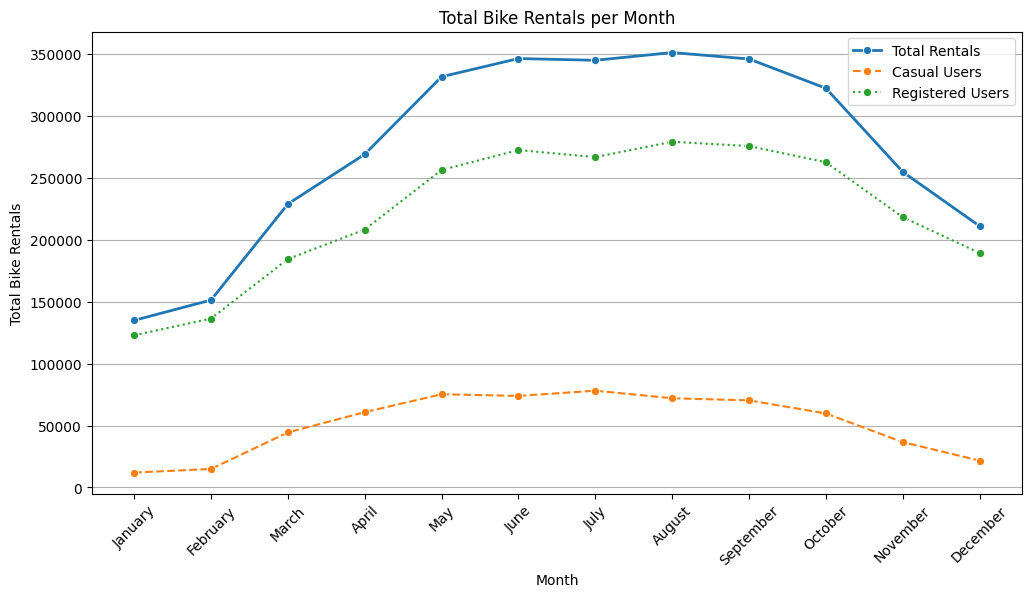

In [ ]:
# Membuat visualisasi jumlah penyewaan sepeda berdasarkan bulan
plt.figure(figsize=(12,6))
sns.lineplot(x='mnth', y='cnt', data=monthly_trend, marker='o', label='Total Rentals', linewidth=2)
sns.lineplot(x='mnth', y='casual', data=monthly_trend, marker='o', label='Casual Users', linestyle='dashed')
sns.lineplot(x='mnth', y='registered', data=monthly_trend, marker='o', label='Registered Users', linestyle='dotted')


# Menambahkan label dan judul
plt.xlabel("Month")
plt.ylabel("Total Bike Rentals")
plt.title("Total Bike Rentals per Month")
plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca
plt.grid(axis='y')
plt.show()

2. **Seberapa besar dampak faktor cuaca terhadap penggunaan sepeda dalam skala bulanan?**

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung total penyewaan sepeda
monthly_trend = data_day.groupby(['mnth']).agg({'temp':'mean','atemp':'mean','hum':'mean','windspeed':'mean'}).reset_index()

# Mapping angka bulan menjadi nama bulan
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Mengubah angka bulan menjadi nama bulan
monthly_trend['mnth'] = monthly_trend['mnth'].map(month_mapping)

# Mengubah 'mnth' menjadi kategori dengan urutan yang benar
monthly_trend['mnth'] = pd.Categorical(monthly_trend['mnth'],
                                       categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                   'July', 'August', 'September', 'October', 'November', 'December'],
                                       ordered=True)

# Mengurutkan berdasarkan kategori bulan agar tidak acak di visualisasi
monthly_trend = monthly_trend.sort_values(by='mnth')

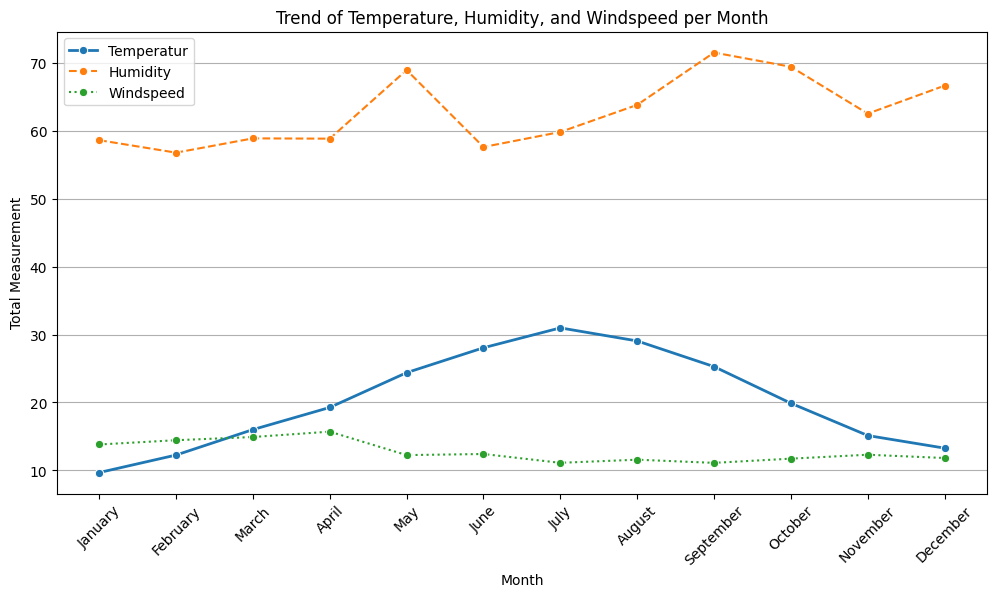

In [ ]:
# Membuat visualisasi jumlah penyewaan sepeda berdasarkan bulan
plt.figure(figsize=(12,6))
sns.lineplot(x='mnth', y='temp', data=monthly_trend, marker='o', label='Temperatur', linewidth=2)
sns.lineplot(x='mnth', y='hum', data=monthly_trend, marker='o', label='Humidity', linestyle='dashed')
sns.lineplot(x='mnth', y='windspeed', data=monthly_trend, marker='o', label='Windspeed', linestyle='dotted')


# Menambahkan label dan judul
plt.xlabel("Month")
plt.ylabel("Total Measurement")
plt.title("Trend of Temperature, Humidity, and Windspeed per Month")
plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca
plt.grid(axis='y')
plt.show()

### **Penjelasan Visualisasi Data Bike Sharing**

Berdasarkan berbagai visualisasi yang telah dibuat, kita dapat mengidentifikasi beberapa pola utama dalam penggunaan sepeda berdasarkan **jam, musim, bulan, dan faktor cuaca**. Berikut adalah penjelasan dari masing-masing grafik:

---

**Tren Penyewaan Sepeda per Jam**
**Insight Utama:**  
- **Pola commuting sangat jelas**, dengan dua puncak utama:
  - **Pukul 8 pagi (08:00)** → Lonjakan penyewaan menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja/sekolah.
  - **Pukul 5-6 sore (17:00 - 18:00)** → Lonjakan kedua menandakan banyaknya pengguna yang menggunakan sepeda untuk perjalanan pulang.
- **Pengguna terdaftar (`registered users`) mendominasi penyewaan pada jam sibuk**, sedangkan **pengguna kasual (`casual users`) meningkat secara bertahap sepanjang hari** dan lebih aktif di sore/malam hari.

**Implikasi Bisnis:**  
- **Optimasi ketersediaan sepeda pada jam commuting** (pagi dan sore).  
- **Targetkan promosi kepada pengguna kasual di sore/malam hari** dengan program diskon atau paket langganan.  

---

**Tren Faktor Cuaca terhadap Penyewaan Sepeda (Per Jam)**
**Insight Utama:**  
- **Suhu (`temp`) meningkat secara bertahap sepanjang hari, mencapai puncak sekitar pukul 14:00-16:00.**  
- **Kelembaban (`humidity`) cenderung tinggi di pagi hari dan mulai turun setelah siang hari, sebelum kembali meningkat di malam hari.**  
- **Kecepatan angin (`windspeed`) relatif konstan sepanjang hari.**  

**Implikasi Bisnis:**  
- **Penyewaan cenderung lebih tinggi saat suhu lebih nyaman** (tidak terlalu panas/dingin).  
- **Menyediakan informasi cuaca secara real-time** di aplikasi untuk membantu pengguna merencanakan perjalanan mereka.  

---

**Penyewaan Sepeda Berdasarkan Musim**
**Insight Utama:**  
- **Musim Gugur (`Fall`) memiliki jumlah penyewaan tertinggi**, diikuti oleh **Musim Panas (`Summer`)**.  
- **Musim Dingin (`Winter`) memiliki jumlah penyewaan lebih rendah dibandingkan musim lain**, tetapi tetap cukup tinggi dibandingkan Musim Semi (`Spring`).  
- **Musim Semi (`Spring`) memiliki jumlah penyewaan terendah**, kemungkinan karena cuaca yang lebih tidak menentu.  

**Implikasi Bisnis:**  
- **Promosi khusus untuk meningkatkan penyewaan di Musim Semi dan Musim Dingin** (misalnya, diskon atau event komunitas).  
- **Pastikan lebih banyak sepeda tersedia di Musim Gugur dan Musim Panas**, karena permintaan lebih tinggi.  

---

**Penyewaan Sepeda Berdasarkan Bulan**
**Insight Utama:**  
- **Jumlah penyewaan meningkat dari Januari hingga Agustus**, mencapai puncaknya di **Juli - Agustus**, lalu mulai menurun lagi setelah Oktober.  
- **Pengguna kasual (`casual users`) lebih dominan di bulan-bulan musim panas**, sedangkan **pengguna terdaftar (`registered users`) lebih konsisten sepanjang tahun**.  

**Implikasi Bisnis:**  
- **Promosi musiman bisa ditargetkan kepada pengguna kasual di musim panas** untuk meningkatkan jumlah penyewaan.  
- **Mempersiapkan lebih banyak sepeda dan pemeliharaan lebih intensif selama musim panas**, karena jumlah penyewaan tertinggi terjadi pada bulan tersebut.  

---

**Tren Faktor Cuaca terhadap Penyewaan Sepeda (Per Bulan)**
**Insight Utama:**  
- **Suhu (`temp`) meningkat dari Januari hingga Juli, lalu mulai menurun setelah Agustus.**  
- **Kelembaban (`humidity`) cenderung lebih tinggi di musim dingin dan lebih rendah di musim panas.**  
- **Kecepatan angin (`windspeed`) relatif stabil sepanjang tahun, dengan sedikit penurunan di pertengahan tahun.**  

**Implikasi Bisnis:**  
- **Penyewaan meningkat saat suhu lebih hangat**, maka **promosi dan event dapat difokuskan pada bulan-bulan dengan suhu optimal (Mei-Agustus).**  
- **Sediakan layanan tambahan seperti jaket hujan atau informasi kondisi cuaca secara real-time untuk meningkatkan penyewaan di musim dingin.**  

---

## Conclusion

### **Kesimpulan Akhir dari Analisis Bike Sharing**

Berdasarkan eksplorasi dan transformasi data yang telah dilakukan, terdapat beberapa **temuan utama** terkait pola penggunaan sepeda berdasarkan **waktu, musim, cuaca, dan jenis pengguna**. Berikut adalah **kesimpulan utama dan rekomendasi bisnis** yang dapat diterapkan:

---

#### **1️⃣ Tren Penyewaan Sepeda Berdasarkan Waktu**
- **Puncak penyewaan terjadi pada jam commuting (08:00 & 17:00-18:00),** menunjukkan bahwa banyak pengguna menggunakan sepeda untuk pergi dan pulang kerja/sekolah.
- **Pengguna terdaftar (`registered users`) mendominasi penyewaan di jam sibuk**, sedangkan **pengguna kasual (`casual users`) lebih aktif di sore dan malam hari**.

**Rekomendasi Bisnis:**


✅ **Optimasi ketersediaan sepeda di jam commuting** untuk menghindari kekurangan sepeda.  
✅ **Targetkan promosi ke pengguna kasual di sore/malam hari** untuk meningkatkan keterlibatan mereka.

---

#### **2️⃣ Pengaruh Cuaca terhadap Penyewaan Sepeda**
- **Suhu (`temp`) berpengaruh besar terhadap jumlah penyewaan sepeda.** Penyewaan lebih tinggi saat suhu hangat (optimal antara 15°C - 30°C).
- **Kelembaban (`humidity`) yang tinggi dapat sedikit menurunkan kenyamanan pengguna, tetapi tidak berpengaruh signifikan.**
- **Kecepatan angin (`windspeed`) relatif stabil sepanjang tahun, sehingga tidak terlalu mempengaruhi pola penggunaan.**

**Rekomendasi Bisnis:**

✅ **Sediakan informasi cuaca real-time di aplikasi** untuk membantu pengguna merencanakan perjalanan mereka.  
✅ **Promosikan penyewaan sepeda pada hari-hari dengan kondisi cuaca optimal** untuk meningkatkan jumlah pengguna.

---

#### **3️⃣ Perbedaan Pola Penyewaan Berdasarkan Musim**
- **Musim Gugur (`Fall`) memiliki jumlah penyewaan tertinggi, diikuti oleh Musim Panas (`Summer`).**  
- **Musim Dingin (`Winter`) dan Musim Semi (`Spring`) memiliki jumlah penyewaan lebih rendah.**  
- **Pengguna kasual lebih dominan di musim panas, sementara pengguna terdaftar lebih stabil sepanjang tahun.**

**Rekomendasi Bisnis:**

✅ **Tingkatkan promosi selama musim dingin dan musim semi** untuk menarik lebih banyak pengguna kasual.  
✅ **Pastikan jumlah sepeda cukup di musim panas dan gugur, karena permintaan tinggi.**  
✅ **Tawarkan diskon atau layanan tambahan selama musim dingin** untuk menjaga jumlah penyewaan tetap stabil.

---

#### **4️⃣ Penyewaan Sepeda Berdasarkan Bulan**
- **Jumlah penyewaan meningkat dari Januari hingga mencapai puncaknya pada Juli-Agustus, kemudian menurun setelah Oktober.**  
- **Pengguna kasual lebih banyak di musim panas, sementara pengguna terdaftar tetap stabil sepanjang tahun.**

**Rekomendasi Bisnis:**

✅ **Fokus pada promosi dan event selama musim panas untuk menarik pengguna kasual.**  
✅ **Lakukan pemeliharaan sepeda lebih intensif di bulan dengan penyewaan tertinggi (Mei-Agustus).**  
✅ **Tawarkan paket berlangganan tahunan kepada pengguna kasual untuk meningkatkan retensi mereka sepanjang tahun.**

---